<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#[Parte-1]-Definindo-funções" data-toc-modified-id="[Parte-1]-Definindo-funções-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>[Parte 1] Definindo funções</a></span><ul class="toc-item"><li><span><a href="#Definindo-estrutura-de-representação-do-problema" data-toc-modified-id="Definindo-estrutura-de-representação-do-problema-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Definindo estrutura de representação do problema</a></span></li><li><span><a href="#Inicializando-o-problema-com-solução-aleatória" data-toc-modified-id="Inicializando-o-problema-com-solução-aleatória-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inicializando o problema com solução aleatória</a></span></li><li><span><a href="#fit-e-penalty-function" data-toc-modified-id="fit-e-penalty-function-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><code>fit</code> e <code>penalty</code> function</a></span></li><li><span><a href="#Seleção-de-pais" data-toc-modified-id="Seleção-de-pais-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Seleção de pais</a></span><ul class="toc-item"><li><span><a href="#Aplicando-rank-no-fit--da-população" data-toc-modified-id="Aplicando-rank-no-fit--da-população-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Aplicando rank no fit  da população</a></span></li><li><span><a href="#Aplicando-transformação-lienar-no-rank-da-população" data-toc-modified-id="Aplicando-transformação-lienar-no-rank-da-população-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Aplicando transformação lienar no rank da população</a></span></li><li><span><a href="#Seleção-de-solução-usando-roleta-de-seleção" data-toc-modified-id="Seleção-de-solução-usando-roleta-de-seleção-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Seleção de solução usando roleta de seleção</a></span></li><li><span><a href="#Escolhendo-pais-para-procriação" data-toc-modified-id="Escolhendo-pais-para-procriação-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Escolhendo pais para procriação</a></span></li></ul></li><li><span><a href="#Cruzamento" data-toc-modified-id="Cruzamento-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Cruzamento</a></span></li><li><span><a href="#Mutação" data-toc-modified-id="Mutação-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Mutação</a></span></li><li><span><a href="#Seleção-de-sobreviventes" data-toc-modified-id="Seleção-de-sobreviventes-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Seleção de sobreviventes</a></span></li><li><span><a href="#Algortimo-genético" data-toc-modified-id="Algortimo-genético-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Algortimo genético</a></span></li></ul></li><li><span><a href="#[Parte-2]-Diferentes-instâncias-de-problema" data-toc-modified-id="[Parte-2]-Diferentes-instâncias-de-problema-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>[Parte 2] Diferentes instâncias de problema</a></span><ul class="toc-item"><li><span><a href="#8-itens" data-toc-modified-id="8-itens-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>8 itens</a></span></li><li><span><a href="#100-itens" data-toc-modified-id="100-itens-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>100 itens</a></span></li><li><span><a href="#800-itens" data-toc-modified-id="800-itens-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>800 itens</a></span></li></ul></li></ul></div>

# [ELE 083] Computação Evolucionária: Trabalho Prático 2
__Alunos:__
- Hernane Braga Pereira - 2014112627
- Nikolas Dias Magalhães Fantoni - 2018019400
---
# Enunciado

Projete e implemente um Algoritmo Genético Geracional (GGA) com codificação binária para solucionar o problema da Mochila 0/1 o qual pode ser descrito da seguinte forma: 

*“Dados N itens, onde cada item possui um benefício (vj) e um peso associado (wj), o problema consiste em selecionar o subconjunto de itens que maximiza a soma dos benefícios sem ultrapassar a capacidade (cap) da Mochila”.* 


<img src="https://www.codesdope.com/staticroot/images/algorithm/knap1.png" alt="knapsack-example" width="400"/>


---
# Resolução do problema:

Este notebook está estruturado em duas partes. A primeira contém todas as funções utilizadas para desenvolver o algoritmo evolucionário e a segunda realiza experimentos.  


---
## [Parte 1] Definindo funções
### Definindo estrutura de representação do problema

O problema será estruturado como um vetor binário, onde 1 representa que o item foi alocado à mochila e 0 que ele não foi.


<br><center> $|0| 1| 1| 1| 0| 1| 0| 0|$ </center>

In [1]:
import string
import numpy as np
import random as rdn
from scipy.stats import rankdata
from matplotlib import pyplot as plt
import unittest
from typing import AnyStr, Callable

---
### Inicializando o problema com solução aleatória

Retorna uma matriz de tamanho $p$ $x$ $n$ onde $p$ é número de soluções candidatas na população e $n$ é o tamanho da mochila. Eles são preenchidos com valores aleatórios 0 e 1. 

In [2]:
def initialise_population(population_size:int, array_len:int, universal_set:set) -> np.ndarray:
    """
    Initialise population with random solutions from the universal set
        
    Arguments:
        population_size -- the size of population defined in the parameters
        array_len -- array length
        universal_set -- numpy array containing all possible elements in the solution
        
    Returns:
        population -- a ndarray with randomly initialize solutions 
    """
    set_type = type(next(iter(universal_set)))
    population = np.empty((population_size, array_len), set_type)

    for i in range(population_size):
        population[i, :] = [list(universal_set)[np.random.randint(len(universal_set))] for i in range(array_len)]
    
    return population

In [3]:
universal_set = {0, 1}
backpack_size = 8
population_size = 5


population = initialise_population(population_size, backpack_size, universal_set)
print('Population shape:', population.shape, '\n\n', population[0:5,:])

Population shape: (5, 8) 

 [[1 1 0 0 1 1 1 1]
 [0 0 1 1 0 1 0 1]
 [0 0 0 0 1 1 0 1]
 [0 1 1 0 1 1 1 0]
 [0 1 0 1 1 1 1 0]]


---
### `fit` e `penalty` function

Nesta seção serão definidas:

1. funcão de penalidade;
2. função de fit

onde a função det fitness $f^{'}(x ^\rightarrow)$ e penalidade $Pen(x ^\rightarrow)$ são definidos como:
<br>
<center>   $ f^{'}(x ^\rightarrow) =  \sum_{j=1}^{N} v_jx_j  - Pen(x ^\rightarrow)$  </center>
onde
<center>  $ Pen(x ^\rightarrow) =  \begin{cases} 0  & \text{if $x ^\rightarrow$ is valid} \\  \rho  \sum_{j=1}^{N} (w_jx_j) -cap & \text{otherwise}  \end{cases} $ </center>
    
com $\rho = max \frac{v_j}{w_j}, \forall j = 1,...,N.$


In [4]:
def penalty(solution: np.array, weights: np.array, item_values: np.array, capacity: int) -> float:
    """ Calculate the penalty of a solution
        Args:   - solution: numpy array of binary solution
                - weight: numpy array of problem weight
                - item_values: numpy array of problem item values
                - capacity: backpack capacity
    """
    weight_solution = np.dot(solution, weights)
    if(weight_solution <= capacity):
        return 0    
    
    else:
        penalty_factor = (item_values/weights).max()
        penalty_value =  penalty_factor*(weight_solution - capacity)
        return penalty_value

In [5]:
def fit(solution: np.array, weights: np.array, item_values: np.array, capacity: int) -> float:
    """ Receive a numpy array with a candidate solution and calculate it fit value
        Args:   - solution: numpy array of binary solution
                - weight: numpy array of problem weight
                - item_values: numpy array of problem item values
                - capacity: backpack capacity
    """
    penalty_value = penalty(solution, weights, item_values, capacity)
    fit_value = np.dot(solution, item_values) - penalty_value
    return fit_value

In [6]:
weight = np.array([10, 18, 12, 14, 13, 11, 8, 6])
item_values = np.array([5, 8, 7, 6, 9, 5, 4, 3])
capacity = 35

print('backpack capacity:', capacity)
print('weight vector:', weight)
print('value vector:', item_values)

print('\nSolutions:')
solution_1 = np.array([0, 0, 0, 1, 1, 1, 1, 1])
solution_2 = np.array([1, 1, 0, 0, 0, 0, 0, 1])

penalty_value_1 = round(penalty(solution_1, weight, item_values, capacity), 3)
penalty_value_2 = round(penalty(solution_2, weight, item_values, capacity), 3)

fit_value_1 = round(fit(solution_1, weight, item_values, capacity), 3)
fit_value_2 = round(fit(solution_2, weight, item_values, capacity), 3)


print(solution_1, '\tpenalty:', penalty_value_1, '\tfit value:', fit_value_1)
print(solution_2, '\tpenalty:', penalty_value_2, '\t\tfit value:', fit_value_2)

backpack capacity: 35
weight vector: [10 18 12 14 13 11  8  6]
value vector: [5 8 7 6 9 5 4 3]

Solutions:
[0 0 0 1 1 1 1 1] 	penalty: 11.769 	fit value: 15.231
[1 1 0 0 0 0 0 1] 	penalty: 0 		fit value: 16


In [7]:
def fit_population(population: np.ndarray, weights: np.array, item_values: np.array, capacity: int) -> np.ndarray:
    """Receive a numpy ndarray with population and return a ndarray containing fit value for each solution"""
    fit_array = np.empty(population.shape[0])
    for i in np.arange(population.shape[0]):
        fit_array[i] = fit(population[i,:], weights, item_values, capacity)
    return fit_array

In [8]:
fit_population_ex = fit_population(population, weight, item_values, capacity)
print('Fit population vector:\n',fit_population_ex)

Fit population vector:
 [12.53846154 15.46153846 17.         14.30769231 11.92307692]


---
### Seleção de pais

Para a seleção de pais será usado o operador de probabilidade de seleção baseado em rankeamento linear e roleta, para isso os seguintes passos são executados:

1. um vetor com o valor de fit da população é recebido e calcula-se o rank entre as soluções candidatas;
2. aplica-se uma transformação linear no ranque, sendo definido por um parâmetro $s$ que indica a inclinação da reta;
3. calcula-se a contribuição proporcional de cada solução candidata que foi ranqueada de forma linear;
4. é calculada a função de probabilidade acumulada da contribuição proporcional de soluções;
5. a função de probabilidade acumulada é passada para a função de roleta que seleciona aleatoriamente qual soluções é escolhida;
6. a função `select_parents` roda a roleta $p$ vezes, onde $p$ é o número de pais a serem selecionados. 

#### Aplicando rank no fit  da população 
Atribui um rank ao vetor de fit da população

In [9]:
def rank_population(fit_population: np.array, rank_method='ordinal') -> np.array:
    """Receive a numpy array with solutions fit value and return a numpy array with its rank"""
    return np.array(rankdata(fit_population, method=rank_method)-1).ravel().astype(int)

In [10]:
fit_example = np.array([1, 9, 5])
rank_example = rank_population(fit_example)
print('Fit example:', fit_example)
print('Rank result:', rank_example)

Fit example: [1 9 5]
Rank result: [0 2 1]


#### Aplicando transformação lienar no rank da população 
Calculo da contribuição proporcional de cada solução candidata que foi ranqueada de forma linear.

In [11]:
def linear_rank(pop_size:int, rank_i:int, s=1.5) -> float:
    """ Compute proportional selection using linear ranking
        Args: - pop_size: population size
              - rank_i: rank position from a solution
              - s: define the line slope on ranking. 1 <= s <= 2
    """
    first_part = (2-s)/pop_size
    second_part = ((2*rank_i)*(s-1))/(pop_size*(pop_size-1))
    return first_part + second_part

In [12]:
def proportional_rank_population(rank_array: np.array, s=1.5) -> np.array:
    """ Compute proportional selection using linear ranking for all population """
    pop_size = len(rank_array)
    proportional_rank_pop = np.empty(pop_size, float)
    for i in range(pop_size):
        proportional_rank_pop[i] = linear_rank(pop_size, rank_array[i], s)
    return proportional_rank_pop

In [13]:
proportional_rank_pop = proportional_rank_population(rank_example)
print('Rank example:', rank_example)
print('Proportional selection to rank example:', proportional_rank_pop.round(3))

Rank example: [0 2 1]
Proportional selection to rank example: [0.167 0.5   0.333]


#### Seleção de solução usando roleta de seleção

<img src="https://www.researchgate.net/publication/311245613/figure/fig3/AS:566020097220608@1511961115040/Roulette-wheel-selection-based-on-fitness.png" alt="roullete-example" width="400"/>


In [14]:
def roulette_selection(cdf_pop: np.array, r: float) -> int:
    """ Select a parent to breed using the roulette wheel selection method
        Args: - cdf_pop: numpy array containing the population cumulative distribution function 
              - r: random float number between 0 and 1
    """
    selected_parent = np.where(cdf_pop >= r)[0][0]
    return selected_parent

In [15]:
rank_proportion_ex = np.array([0.31, 0.05, 0.38, 0.12, 0.14])
cdf_pop = np.cumsum(rank_proportion_ex)
print('Given the rank proportion example:', rank_proportion_ex)
print('The cumulative distribution function is:', cdf_pop)
print('\nFor a random number r = 0.5 the selected parent is at index:', roulette_selection(cdf_pop, 0.5))

Given the rank proportion example: [0.31 0.05 0.38 0.12 0.14]
The cumulative distribution function is: [0.31 0.36 0.74 0.86 1.  ]

For a random number r = 0.5 the selected parent is at index: 2


#### Escolhendo pais para procriação
Dado o vetor de proporcionalidade de soluções, a roleta é executada $p$ vezes, onde $p$  é o número de pais a serem selecionados.

In [16]:
def select_parents(proportional_fit: np.array, number_parents) -> np.array:
    """ Return a numpy containing selected parents for breeding
        Args: - proportional_fit: numpy array containing fitness proportion for each solution
              - number_parents: number of parents to select
    """
    select_parents = np.empty(number_parents, int)
    cdf_pop = np.cumsum(proportional_fit)
    for i in np.arange(number_parents):
        r = rdn.random()
        select_parents[i] = roulette_selection(cdf_pop, r)
    return select_parents

In [17]:
rank_proportion_ex = np.array([0.31, 0.05, 0.38, 0.12, 0.14])
print('Given the rank proportion example:', rank_proportion_ex)

parents = select_parents(rank_proportion_ex, 5)
print('\nSelecting 5 parents for breeding the follow solutions are chosen:\n', parents)

Given the rank proportion example: [0.31 0.05 0.38 0.12 0.14]

Selecting 5 parents for breeding the follow solutions are chosen:
 [3 0 0 2 4]


---
### Cruzamento
Esta etapa é dividida em dois tipos de funções:
- funções de cruzamento: `breed_equal_gene` e `breed_crosspoint`;
- funções de cruzamento da população: `breed_popultion`.

O primeira tipo de função realiza o cruzamento de dois pais para gerar dois filhos, enquanto o segundo tipo segunda executa este procedimento em uma população. 

Em relação as funções de cruzamento, dois tipos diferentes serão combinados durante o algoritmo genético proposto.

- A função `breed_equal_gene` analisa a semelhança entre dois pais. Posições que são iguais são repassadas para frente, as que são diferentes recebem um valor aleatório dentro do espaço amostral.

- A função `breed_crosspoint` seleciona aleatoriamente um ponto de corte do vetor e os filhos recebem uma parte de cada pai. 

In [18]:
def breed_equal_gene(parent_A: np.ndarray, parent_B: np.ndarray, universal_set: set) -> np.ndarray:
    """ 
    Returns a numpy ndarray of 2 children
    Arguments:
        parent_A, parent_B -- the solutions candidate to breeding
        universal_set -- universal set of problem
    """
    len_parent = len(parent_A)
    children = np.empty((2, len_parent), dtype=int)
    
    for i in range(0, len_parent, 1):
        if(parent_A[i] == parent_B[i]):
            children[:,i] = parent_A[i]
        else:
            children[0,i] = list(universal_set)[np.random.randint(len(universal_set))]
            children[1,i] = list(universal_set)[np.random.randint(len(universal_set))]
    
    return children

In [19]:
def breed_crosspoint(parent_A: np.ndarray, parent_B: np.ndarray, universal_set: set) -> np.ndarray:
    """ 
    Returns a numpy ndarray of 2 children
    Arguments:
        parent_A, parent_B -- the solutions candidate to breeding
        crossover_point -- percentual point of cut (between 0 and 1)
    """
    len_parent = len(parent_A)
    crossover_point = np.random.randint(len_parent)
    children = np.empty((2, len_parent), dtype=int)
    
    children[0, 0:crossover_point] = parent_A[0:crossover_point]
    children[0, crossover_point:] = parent_B[crossover_point:]
    
    children[1, 0:crossover_point] = parent_B[0:crossover_point]
    children[1, crossover_point:] = parent_A[crossover_point:]
    
    return children

In [20]:
parent_A = [1,0,0,1,0]
parent_B = [1,1,1,1,0]

children1 = breed_equal_gene(parent_A, parent_B, universal_set)
children2 = breed_crosspoint(parent_A, parent_B, universal_set)

print('Parent A:', parent_A)
print('Parent B:', parent_B)
print('\nChildren with equal gene function:\n', children1)

print('\nChildren with crosspoint function:\n', children2)

Parent A: [1, 0, 0, 1, 0]
Parent B: [1, 1, 1, 1, 0]

Children with equal gene function:
 [[1 0 0 1 0]
 [1 0 0 1 0]]

Children with crosspoint function:
 [[1 1 1 1 0]
 [1 0 0 1 0]]


In [21]:
def breed_population(population: np.ndarray, parents: np.array, children_number, universal_set, breed) -> np.ndarray:
    """ Return a numpy ndarray with children given a population and a array containing the indexes of selected parents """
    if(children_number > len(parents) or children_number < 2):
        print('Exiting bree function. Number of children must be less or equal then number or parents. Minimum of 2 children.')
        print('Returning original population.')
        return population
    
    children = np.empty((children_number, population.shape[1]), int)
    
    for i in range(0, children_number, 2):
        parent_A = parents[i]
        next_i = i+1
        if(next_i >= len(parents)):
            parent_B = parents[0]
            children[i, :] = breed(population[parent_A, :], population[parent_B, :], universal_set)[0]
            
        else:
            parent_B = parents[next_i]
            children[i:next_i+1, :] = breed(population[parent_A, :], population[parent_B, :], universal_set) 
        
    return children

---
### Mutação

Dado um par de filhos é calculada a chance de mutação, onde é realizada a operação de _bit flip_ valores com 0 se tornam 1 e valores com 1 se tornam 0.

In [22]:
def mutation_bitflip(children: np.array, mutation_chance=0.5) -> np.ndarray:
    """ Apply mutation to children using bitflip """
    r = np.random.rand(1)
    if(r <= mutation_chance):
        bit_pos = np.random.randint(len(children))
        if(children[bit_pos] == 1): children[bit_pos] = 0
        else: children[bit_pos] = 1
    return children

In [23]:
def mutation_population(children: np.array, mutation: Callable, mutation_chance=0.5) -> np.ndarray:
    """ Apply mutation on population """
    for i in np.arange(children.shape[0]):
        children[i,:] = mutation(children[i,:], mutation_chance)
    return children

In [24]:
children = np.array([[1, 1, 1, 1, 1, 1, 1, 1],
                     [0, 0, 0, 0, 0, 0, 0 ,0],
                     [1, 0, 1, 0, 1, 0, 1, 0]])
print('Children:\n', children)
children_mutated = mutation_population(children, mutation_bitflip, 1)
print('\nChildren mutaded:\n', children_mutated)


Children:
 [[1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 0]]

Children mutaded:
 [[1 1 1 1 1 1 1 0]
 [0 0 1 0 0 0 0 0]
 [1 0 0 0 1 0 1 0]]


---
### Seleção de sobreviventes

Seleção é composta de duas etapas:

1. próxima geração é gerada à partir de pais e filhos;
2. é aplicada uma pressão seletiva que remove o percentual desejado de piores soluções.

In [25]:
def generation_selection(parents: np.ndarray, children: np.ndarray) -> np.ndarray:
    """ Select the candidate solution for next generation """
    next_gereration = np.concatenate((parents, children), axis=0)
    return next_gereration

In [26]:
parents = np.array([[0,1,0,1,0, 1, 1,0],
                      [0,0,0,1,1, 0, 0,1]])

children = np.array([[1, 1, 1, 0, 0, 1, 1, 1],
                     [1, 0, 0, 1, 1, 0, 1, 0]])

next_generation = generation_selection(parents, children)
print('Parents:\n', parents)
print('Children:\n', children)
print('\nNext generation:\n', next_generation)

Parents:
 [[0 1 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1]]
Children:
 [[1 1 1 0 0 1 1 1]
 [1 0 0 1 1 0 1 0]]

Next generation:
 [[0 1 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1]
 [1 1 1 0 0 1 1 1]
 [1 0 0 1 1 0 1 0]]


In [27]:
def meritocracy_society(fit_pop: np.array, elimination_factor: int = 0.3) -> np.array:
    """ Return population index to be selected given a array of fit values and a elimination factor between 0 and 1.
        The solutions with less fit value are eliminated   
    """
    index_cut = round(len(fit_pop)*(1 - elimination_factor))

    sorted_population = np.empty((len(fit_pop), 2))
    sorted_population[:, 0] = np.arange(len(fit_pop))
    sorted_population[:, 1] = fit_pop

    sorted_population = sorted_population[sorted_population[:,1].argsort()[::-1]]
    sorted_population = sorted_population[0:index_cut, :]
    return sorted_population[:,0].astype(int)    

In [28]:
print('Next generation before selection pressure:\n', next_generation)

fit_pop = fit_population(next_generation, weight, item_values, capacity)
print('\nFit from each solution:', fit_pop.round(3))
best_next_generation = meritocracy_society(fit_pop)
print('\nNext generation after selection pressure removed 30%:\n', next_generation[best_next_generation,:])


Next generation before selection pressure:
 [[0 1 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1]
 [1 1 1 0 0 1 1 1]
 [1 0 0 1 1 0 1 0]]

Fit from each solution: [11.923 18.    11.231 17.077]

Next generation after selection pressure removed 30%:
 [[0 0 0 1 1 0 0 1]
 [1 0 0 1 1 0 1 0]
 [0 1 0 1 0 1 1 0]]


---
### Algortimo genético
1. algortimo é inicializado com soluções aleatórias;
2. é calculado o fit da população;
3. enquanto o número total de gerações não for alcançado ou o melhor fit não se altere durante *g* gerações faça:
    2. remova os menos aptos;
    3. rankeie a população de acordo com o fit;
    4. selecione pais para cruzamento;
    5. gere filhos usando os dois tipos de cruzamento;
    6. aplique mutação;
    7. calcule o fit dos filhos 
    8. gere a nova geração com pais + filhos

In [29]:
def GA_backpack(universal_set, weight, item_values, capacity, parents_number,
                children_number, elimination_factor, mutation_chance, generation_change=20):
    
    result = {'best_solution': [], 'log_best_fit': [], 'log_mean_fit':[]}
    fit_pop = [] 
    diff_lst = []
    gen_dif = -1
    
    # Start population
    population = initialise_population(population_size, len(weight), universal_set)
    most_adapted_idx = np.arange(len(population))
    
    fit_pop = fit_population(population, weight, item_values, capacity)  

    for i in range(0, generations, 1):           
        if(i != 0):
            most_adapted_idx = meritocracy_society(fit_pop, elimination_factor) 

        fit_pop = fit_pop[most_adapted_idx]
        population = population[most_adapted_idx]
        
        idx_best_solution = np.where(fit_pop == np.amax(fit_pop))[0][0]
        result['best_solution'] = population[idx_best_solution, :]

        result['log_best_fit'].append(fit_pop.max())
        result['log_mean_fit'].append(fit_pop.mean())
        
        if(i > 0): diff_lst.append(result['log_best_fit'][i] - result['log_best_fit'][i-1]) 
        
        if( i > generation_change+1):
            diff_np = np.array(diff_lst)
            gen_dif = diff_np[-generation_change:].mean()

        # stop criteria
        solution_weight = np.dot(result['best_solution'], weight)
        if(solution_weight <= capacity and gen_dif == 0):
            print('Stopping algorithm. Fit value didn\'t change after',generation_change,'gerenations.')
            break

        rank_pop = rank_population(fit_pop)
        proport_rank_pop = proportional_rank_population(rank_pop)
        
        parents = select_parents(proport_rank_pop, parents_number)
        children1 = breed_population(population, parents, children_number, universal_set, breed_crosspoint)
        
        parents = select_parents(proport_rank_pop, parents_number)
        children2 = breed_population(population, parents, children_number, universal_set, breed_equal_gene)
        
        children = np.concatenate((children1, children2), axis=0)
        children = mutation_population(children, mutation_bitflip, mutation_chance)
        
        
        fit_children = fit_population(children, weight, item_values, capacity)  
        fit_pop = np.concatenate((fit_pop, fit_children))

        population = generation_selection(population, children)
                
    return result

__Mostrar resultados__ 

In [30]:
def show_results(best_solution, weight, item_values, capacity, log, mean_log):

    print('\nFit:', np.dot(item_values, best_solution))
    print('Solution weight:', np.dot(weight, best_solution))
    print('Backpack capacity:', capacity)


    log = np.array(log)
    mean_log = np.array(mean_log)
    
    plt.title("Generations log:")
    plt.xlabel("Generations")
    plt.ylabel("Fit value")
    plt.plot(log, 'b-', label='Best')
    plt.plot(mean_log, 'g-', label='Mean')
    plt.legend()

    plt.show()
    print('Best solution:\n', best_solution)

---
## [Parte 2] Diferentes instâncias de problema
### 8 itens
Aqui são usados os dados do enunciado

In [31]:
universal_set = {0, 1}
weight = np.array([10, 18, 12, 14, 13, 11, 8, 6])
item_values = np.array([5, 8, 7, 6, 9, 5, 4, 3])
capacity = 35


mutation_chance = 0.1
population_size = 50
generations = 100
elimination_factor = 0.4
children_number = 20
parents_number = children_number
generation_change = 20


Fit: 21
Solution weight: 36
Backpack capacity: 35


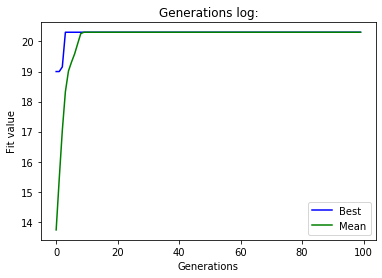

Best solution:
 [0 0 1 0 1 1 0 0]


In [32]:
result = GA_backpack(universal_set, weight, item_values, capacity, 
                     parents_number, children_number, elimination_factor, mutation_chance, generation_change)

show_results(result['best_solution'], weight, item_values, capacity, result['log_best_fit'], result['log_mean_fit'])

### 100 itens 
Tanto o vetor de pesos, quanto de valores foi inicializado aleatoriamente com valores:
- peso: de 1 a 15
- valor: de 1 a 9

In [33]:
n_itens = 100

weight = np.random.randint(14, size=n_itens) +1
item_values = np.random.randint(8, size=n_itens) +1
capacity = 40


universal_set = {0, 1}



mutation_chance = 0.2
population_size = 100
generations = 600
elimination_factor = 0.4
children_number = 100
parents_number = children_number
generation_change = 50

Stopping algorithm. Fit value didn't change after 50 gerenations.

Fit: 76
Solution weight: 40
Backpack capacity: 40


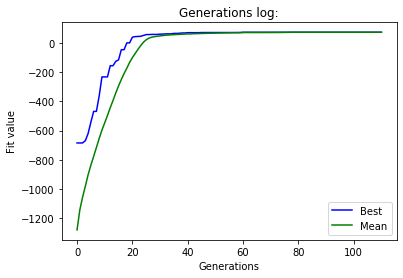

Best solution:
 [0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]


In [34]:
result = GA_backpack(universal_set, weight, item_values, capacity, 
                     parents_number, children_number, elimination_factor, mutation_chance, generation_change)

show_results(result['best_solution'], weight, item_values, capacity, result['log_best_fit'], result['log_mean_fit'])

### 800 itens 
Tanto o vetor de pesos, quanto de valores foi inicializado aleatoriamente com valores:
- peso: de 1 a 15
- valor: de 1 a 9

In [35]:
n_itens = 800

weight = np.random.randint(14, size=n_itens) +1
item_values = np.random.randint(8, size=n_itens) +1
capacity = 40

universal_set = {0, 1}


mutation_chance = 0.5
population_size = 400
generations = 1000
elimination_factor = 0.5
children_number = 250
parents_number = children_number
generation_change = 50

Stopping algorithm. Fit value didn't change after 50 gerenations.

Fit: 252
Solution weight: 40
Backpack capacity: 40


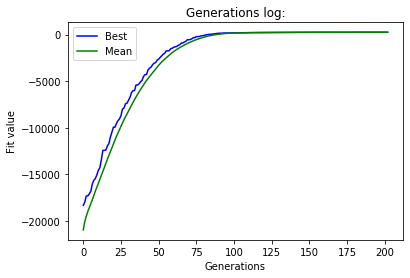

Best solution:
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 

In [36]:
result = GA_backpack(universal_set, weight, item_values, capacity, 
                     parents_number, children_number, elimination_factor, mutation_chance, generation_change)

show_results(result['best_solution'], weight, item_values, capacity, result['log_best_fit'], result['log_mean_fit'])

__Teste unitarios utilizando durante o desenvolvimento__

In [37]:
class Test_GA(unittest.TestCase):
    def test_penalty(self):
        weight = np.array([10, 18, 12, 14, 13, 11, 8, 6])
        value = np.array([5, 8, 7, 6, 9, 5, 4, 3])
        capacity = 35
        
        solution_1 = np.array([0, 0, 0, 1, 1, 1, 1, 1])
        solution_2 = np.array([1, 1, 0, 0, 0, 0, 0, 1])
        
        result_1 = penalty(solution_1, weight, value, capacity)
        result_2 = penalty(solution_2, weight, value, capacity)
        
        expected_1 = 11.769
        expected_2 = 0
        
        self.assertEqual(result_1.round(3), expected_1)
        self.assertEqual(result_2, expected_2)

In [38]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_penalty (__main__.Test_GA) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
